<a href="https://colab.research.google.com/github/Azizbek-Akhmadov/Mid-term-exam-AI-applications-system/blob/main/week11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py' 
r = requests.get(url)
# make sure your filename is the same as how you want to import 
with open('utilities.py', 'w') as f:
  f.write(r.text)

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader 
import numpy as np
import matplotlib.pyplot as plt
from utilities import train_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = '//content/book_store_sales.csv'
def readfile(file_name):
  file = open(file_name,	encoding='utf—8')
  next(file)
  data = []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
    file.close()
    return np.array(data, dtype=np.float32)
# Read data and split up into train and test data. 
sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = df['Value'][0:split]
test_sales = df['Value'][split:]

In [9]:
import pandas as pd
df=pd.read_csv('/content/book_store_sales.csv')
df

,Period,Value
0,Jan-92,790
1,Feb-92,539
2,Mar-92,535
3,Apr-92,523
4,May-92,552
...,...,...
343,Aug-20,725
344,Sep-20,583
345,Oct-20,427
346,Nov-20,465


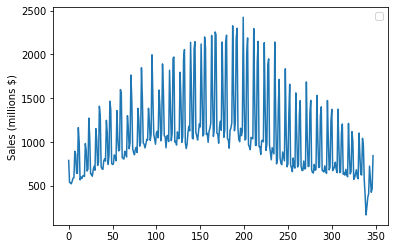

In [ ]:
plt.plot(df['Value'])
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

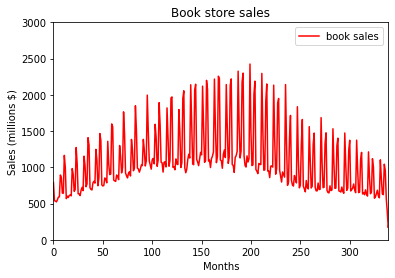

In [ ]:
#Plot dataset
x = range(len(sales))
plt.plot(df["Value"], 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

In [14]:
# Plot naive prediction
test_output = test_sales [MIN:]
naive_prediction = test_sales [MIN-1:-1]
x = range (len(test_output))
plt.plot(x,test_output, 'g-', label='test_output')
plt.plot(x,naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis ([0, 60, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt. legend()
plt.show()

In [16]:
in_X[i, -(i+MIN), 0] = train_sales_std [0:i+MIN]
  train_y[i, 0] = train_sales_std[i+MIN]
  # Create test examples.
  test_months = len(test_sales)
  test_X = np.zeros((test_months-MIN)),
  test_y = np.zeros((test_months-MIN, 1), dtype=np.float32)

for i in range(0, test_months-MIN):
  test_X[I, (i+MIN), 0] = test_sales_std [0:i+MIN]
  test_y[i, 0] = test_sales_std [i+MIN]
  
  # Create Da# Standardize train and test data.
# Use only training seasons to compute mean and stddev.
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

# Create train examples.
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1), dtype=np.float32)
train_y= np.zeros((train_months-MIN, 1), dtype=np.float32)
for i in range(0, train_months-MIN):
  trataset objects.
trainset=TensorDataset (torch.from_numpy (train_X).clone(), torch.from_numpy(train_y))
testset=TensorDataset (torch.from_numpy(test_X).clone(), torch.from_numpy(test_y))


# Custom layer that retrieves only last time step from RNN output.
class LastTimestep(nn. Module):
  def forward(self, inputs):
    return inputs [1] [0]
# Create RNN model
model=nn.Sequential(nn.RNN (1, 128, nonlinearity='relu', batch_first=True), 
                    LastTimestep(),
                    nn.Linear (128, 1)
                    
                    )

# Loss function and optimizer.
optimizer=torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()
# Train model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset,optimizer, loss_function, 'mae')

In [17]:
# Standardize train and test data.
# Use only training seasons to compute mean and stddev.
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

# Create train examples.
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1), dtype=np.float32)
train_y= np.zeros((train_months-MIN, 1), dtype=np.float32)
for i in range(0, train_months-MIN):
  train_X[i, -(i+MIN), 0] = train_sales_std [0:i+MIN]
  train_y[i, 0] = train_sales_std[i+MIN]
  # Create test examples.
  test_months = len(test_sales)
  test_X = np.zeros((test_months-MIN)),
  test_y = np.zeros((test_months-MIN, 1), dtype=np.float32)

for i in range(0, test_months-MIN):
  test_X[I, (i+MIN), 0] = test_sales_std [0:i+MIN]
  test_y[i, 0] = test_sales_std [i+MIN]
  
  # Create Dataset objects.
trainset=TensorDataset (torch.from_numpy (train_X).clone(), torch.from_numpy(train_y))
testset=TensorDataset (torch.from_numpy(test_X).clone(), torch.from_numpy(test_y))


# Custom layer that retrieves only last time step from RNN output.
class LastTimestep(nn. Module):
  def forward(self, inputs):
    return inputs [1] [0]
# Create RNN model
model=nn.Sequential(nn.RNN (1, 128, nonlinearity='relu', batch_first=True), 
                    LastTimestep(),
                    nn.Linear (128, 1)
                    
                    )

# Loss function and optimizer.
optimizer=torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()
# Train model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset,optimizer, loss_function, 'mae')